# **Denim Data Preparation**

## Importing Necessary Libraries

In [1]:
import cv2
import os
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import scipy.ndimage
import random

## Defining ImageDataGenerator 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             shear_range=0.15, 
                             zoom_range=0.1,
                             channel_shift_range = 10,
                             horizontal_flip=True)

**Specifying Path of the Images Dataset**

In [3]:
dataPath = "data"

## Function for generating images

**Creating a function to loading images from the drive and create more images from existing ones with the help of ImageDataGenerator**

In [4]:
def augDataSaver(dataPath):
    for cls in os.listdir(dataPath):
        classPath = f"{dataPath}/{cls}"
        for pic in os.listdir(classPath):
            picturePath = f"{classPath}/{pic}"
            img = cv2.imread(picturePath)  
            image = np.expand_dims(img, 0)
            datagen.fit(image)
            
            for x, val in zip(datagen.flow(image,
                                           save_to_dir=classPath,
                                           save_prefix='aug',
                                           save_format='png'),range(20)):
                pass

In [5]:
# # Calling the Above Function to Generate more Images
# augDataSaver(dataPath)

## Creating Function For Loading the data

**Creating DataLoader Function to Load the Data and Extract the Images and Labels from the Data**

In [6]:
def dataLoader(dataPath):
    data = []
    for cls in os.listdir(dataPath):
        classPath = f"{dataPath}/{cls}"
        for pic in os.listdir(classPath):
            picturePath = f"{classPath}/{pic}"
            img = cv2.imread(picturePath)
            imgResized = cv2.resize(img, (224, 224))
            data.append([imgResized, cls])
    return data

In [7]:
# Calling the Above Function to for data loading and images extraction with its labels
data = dataLoader(dataPath)

In [8]:
# Shuffling the data for better Results
random.shuffle(data)

## Creating a Function To Separate Independent and dependent Variables

In [9]:
def separator(data):
    X = []
    y = []
    
    for feature, label in data:
        X.append(feature)
        y.append(label)
    return np.array(X), np.array(y)

In [10]:
# Calling the Separator Function
X, y = separator(data)

## Plotting Independent Variable

<AxesSubplot:ylabel='count'>

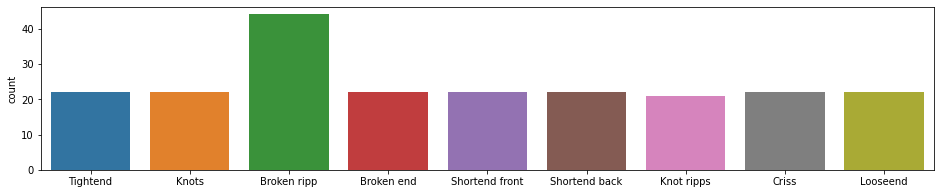

In [11]:
# Plotting Independent Variable to Explore the Number data(images) present in Each Class
plt.figure(figsize = (16, 3))
sns.countplot(x =y)

# Encoding Target Variable

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_Encode =  encoder.fit_transform(y)

## Splitting the data into Training, Testing and validation

In [13]:
from sklearn.model_selection import train_test_split

# Splitting our data into 70% Traning and 20% for Model Tesing
X_train, X_test, y_train, y_test = train_test_split(X, y_Encode, test_size=0.2, random_state = 42)

# Again Splitting our Traning data into Traning And Validation (20%) data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                                test_size=0.2)

**Checking the Shapes of the Data after Splitting**

In [14]:
print("Shapes of the Splitted Dataset\n")
print(f"Shape of X train {X_train.shape}")
print(f"Shape of Y train {y_train.shape}\n")

print(f"Shape of X test {X_test.shape}")
print(f"Shape of Y test {y_test.shape}\n")

print(f"Shape of X Validation {X_val.shape}")
print(f"Shape of Y Validation {y_val.shape}")

Shapes of the Splitted Dataset

Shape of X train (140, 224, 224, 3)
Shape of Y train (140,)

Shape of X test (44, 224, 224, 3)
Shape of Y test (44,)

Shape of X Validation (35, 224, 224, 3)
Shape of Y Validation (35,)


**As we will be Using Softmax because of Multiclass Classification so we have to convert it into the probability format**

In [15]:
from keras.utils.np_utils import to_categorical
y_train_c = to_categorical(y_train,9)
y_val_c = to_categorical(y_val,9)
y_test_c = to_categorical(y_test,9)

In [16]:
y_train_c[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Scaling data

In [17]:
X_train_scaled = X_train/255.0
X_val_scaled = X_val/255.0
X_test_scaled = X_test/255.0

## Model Building

In [35]:
# Defining A sequential Model
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (224, 224, 3),strides=(1, 1), activation = 'relu'))
model.add(keras.layers.Conv2D(32, kernel_size = (3,3),strides=(1, 1), activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2), strides=(2, 2))) 

model.add(keras.layers.Conv2D(64, kernel_size = (3,3),strides=(1, 1), activation = 'relu'))
model.add(keras.layers.Conv2D(64, kernel_size = (3,3),strides=(1, 1), activation = 'relu'))
model.add(keras.layers.MaxPool2D((2,2)))  

model.add(keras.layers.Conv2D(32, kernel_size = (3,3),strides=(1, 1), activation = 'relu'))
model.add(keras.layers.Conv2D(32, kernel_size = (3,3),strides=(1, 1), activation = 'relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Flatten())  
model.add(keras.layers.Dropout(0.5)) 

model.add(keras.layers.Dense(400,activation='relu'))  
model.add(keras.layers.Dropout(0.5))  
model.add(keras.layers.Dense(9, activation='softmax'))  


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 51, 51, 32)       

## Model Compilation

In [36]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics  = ["accuracy"])

## Training the Model 

In [37]:
history = model.fit(X_train_scaled, y_train_c,
                    epochs = 50,
                    validation_data = (X_val_scaled, y_val_c),
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights = True))

Epoch 1/50
5/5 [==============================] - 29s 6s/step - loss: 2.2729 - accuracy: 0.1071 - val_loss: 2.1840 - val_accuracy: 0.1429
Epoch 2/50
5/5 [==============================] - 27s 5s/step - loss: 2.1897 - accuracy: 0.1143 - val_loss: 2.1350 - val_accuracy: 0.1429
Epoch 3/50
5/5 [==============================] - 27s 5s/step - loss: 2.1666 - accuracy: 0.2500 - val_loss: 2.0074 - val_accuracy: 0.3143
Epoch 4/50
5/5 [==============================] - 28s 6s/step - loss: 1.9225 - accuracy: 0.3000 - val_loss: 1.6843 - val_accuracy: 0.4286
Epoch 5/50
5/5 [==============================] - 28s 6s/step - loss: 1.7605 - accuracy: 0.3071 - val_loss: 1.4504 - val_accuracy: 0.6000
Epoch 6/50
5/5 [==============================] - 27s 5s/step - loss: 1.5454 - accuracy: 0.3857 - val_loss: 1.4735 - val_accuracy: 0.4857
Epoch 7/50
5/5 [==============================] - 28s 6s/step - loss: 1.3861 - accuracy: 0.4143 - val_loss: 1.1781 - val_accuracy: 0.5429
Epoch 8/50
5/5 [==================

## Visualizing The Model Performance

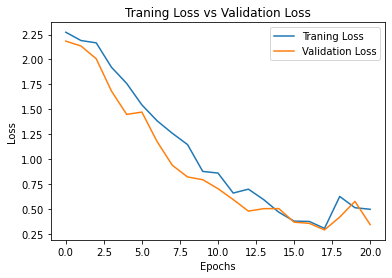

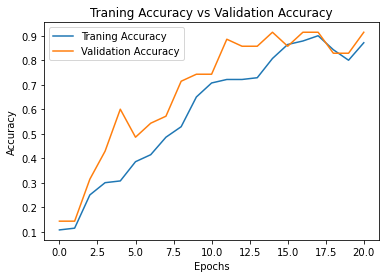

In [38]:
# Displayiong the Traning and Validation Loss
plt.title("Traning Loss vs Validation Loss")
plt.plot(history.history['loss'], label='Traning Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Displayiong the Traning and Validation Accuracy
plt.title("Traning Accuracy vs Validation Accuracy")
plt.plot(history.history['accuracy'], label='Traning Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Evaluating our Model

In [61]:
# Evaluating our Model Performance with the test Data
Performance = model.evaluate(X_test_scaled, y_test_c)

# Printing The Scores and Accuracy of Test Adata
print(f"Test Loss = {Performance[0]}")
print(f"Test Accuracy = {Performance[1]}")

2/2 [==============================] - 1s 581ms/step - loss: 0.1960 - accuracy: 0.9545
Test Loss = 0.19601716101169586
Test Accuracy = 0.9545454382896423


In [62]:
# Taking single image from Test data
img = X_test_scaled[0]
img.shape

(224, 224, 3)

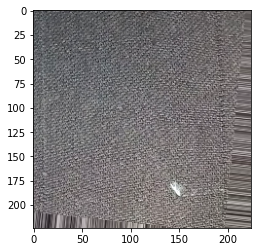

In [63]:
# Displaying the Image
plt.imshow(img)

In [64]:
# Reshaping the Size for Prediction
img = img.reshape(1, 224, 224, 3)

In [65]:
model.predict_classes(img)

array([0], dtype=int64)

In [66]:
# Checking the Actual Label of the Above data
y_test_c[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict_classes(X_test_scaled)

Matrix = confusion_matrix(y_test, y_test_pred)

<AxesSubplot:>

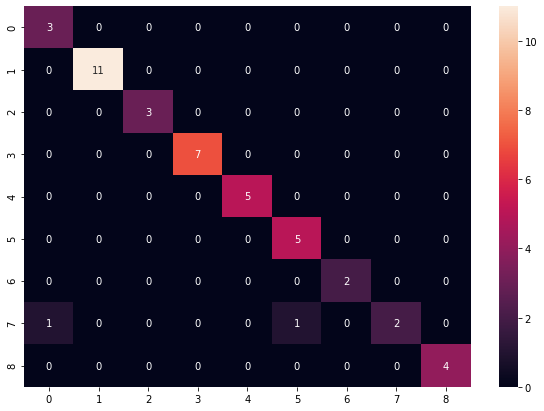

In [68]:
# Displaying the Above Matrix Using Heatmap
plt.figure(figsize = (10, 7))
sns.heatmap(Matrix, annot = True)

## Classification Report

In [69]:
from sklearn.metrics import classification_report
# Printing the Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         4
           8       1.00      1.00      1.00         4

    accuracy                           0.95        44
   macro avg       0.95      0.94      0.94        44
weighted avg       0.96      0.95      0.95        44

